<a href="https://colab.research.google.com/github/iam-tarun/air-passenger-forecast-sarima/blob/master/Air_Passenger_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose


Loading the Air Passenger dataset

In [10]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

In [11]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Set month as index

In [13]:
df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")
df.set_index('Month', inplace=True)

In [14]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [16]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


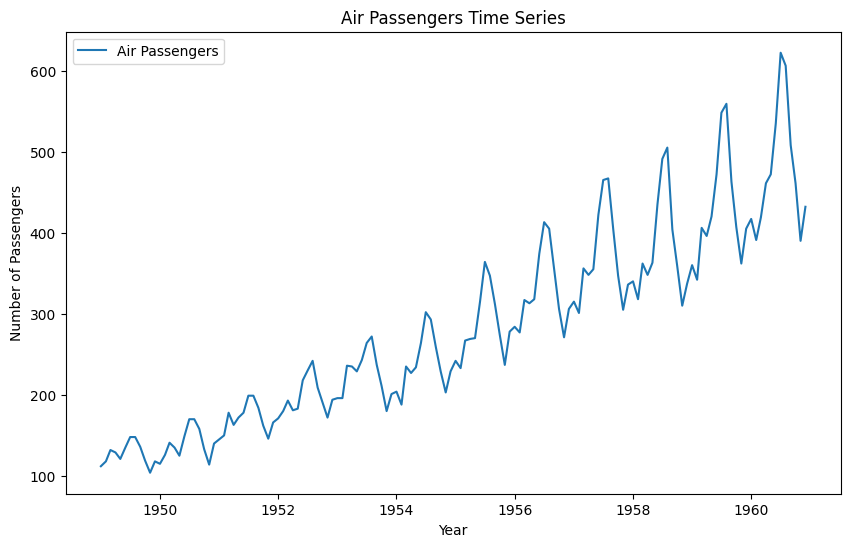

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], label='Air Passengers')
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

From the above time series graph, we can say that the passenger data follows a possitive trend, and it also shows seasonality. So we can use predictive models to forecast the passenger intake.

Finding Seasonal Period

Using the auto correlation function, we can find the seasonal period.

<Figure size 1200x600 with 0 Axes>

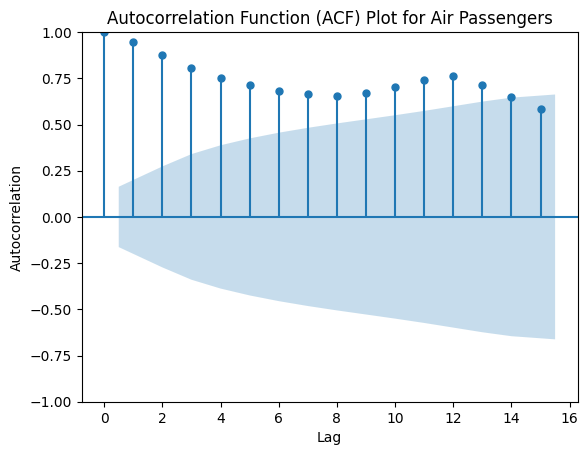

In [22]:
plt.figure(figsize=(12, 6))
plot_acf(df['Passengers'], lags=15)
plt.title('Autocorrelation Function (ACF) Plot for Air Passengers')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

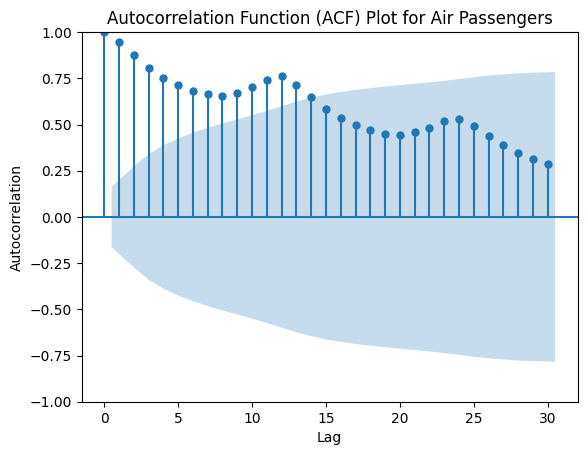

In [23]:
plt.figure(figsize=(12, 6))
plot_acf(df['Passengers'], lags=30)
plt.title('Autocorrelation Function (ACF) Plot for Air Passengers')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

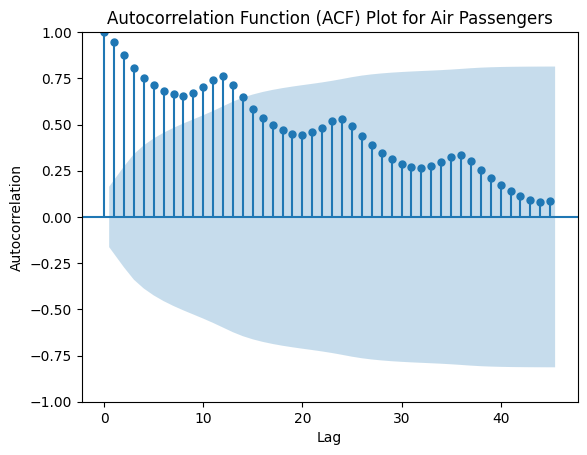

In [24]:
plt.figure(figsize=(12, 6))
plot_acf(df['Passengers'], lags=45)
plt.title('Autocorrelation Function (ACF) Plot for Air Passengers')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

From the above graphs of auto correlation values against lag (period) we can see that the peak is repeating for every 12 units in the x-axis. From this we can infer that the seasonal period for this air passengers dataset is 12 (yearly seasonality)

Decompose the time series into its individual components such as seasonality, trend and residual

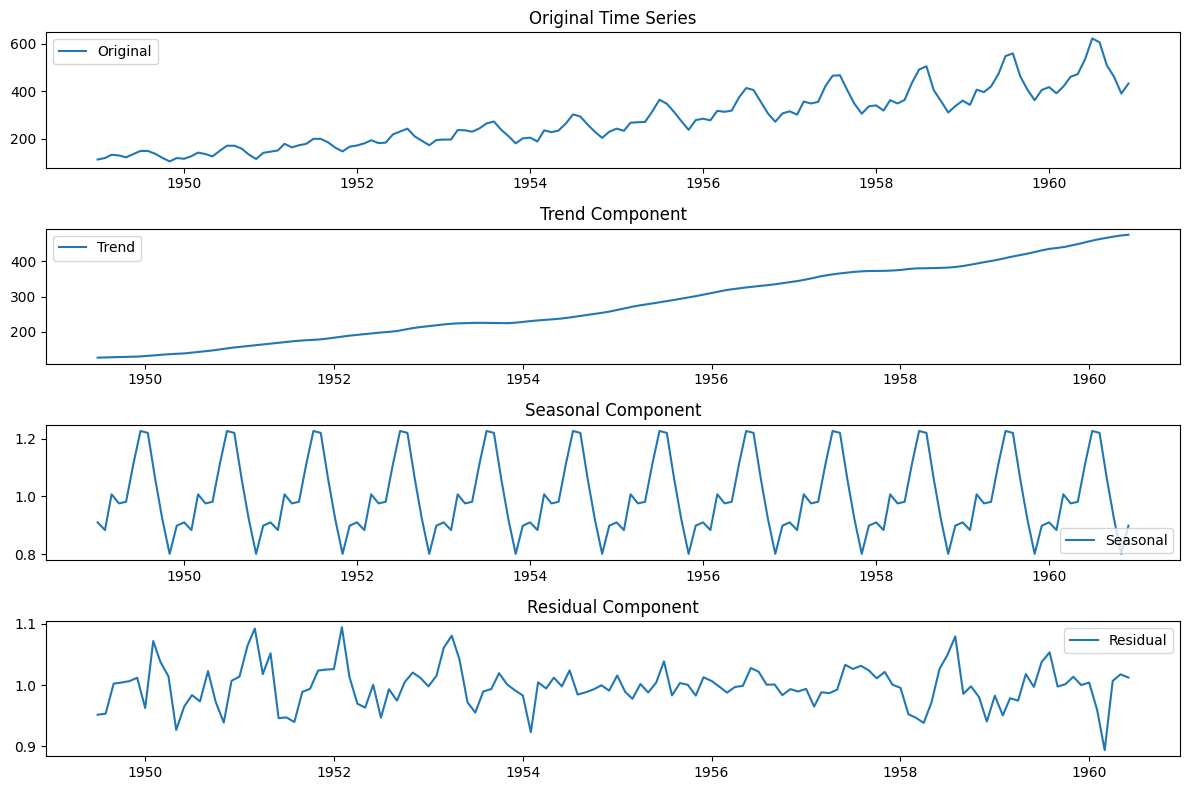

In [26]:
# Decompose the time series
result = seasonal_decompose(df['Passengers'], model='multiplicative')

# Plot the original time series
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Passengers'], label='Original')
plt.title('Original Time Series')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


If we have to make yearly predictions, we have to remove the seasonality from this data.

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [28]:
# Choose SARIMA order parameters based on decomposition and ACF/PACF plots
# Example: ARIMA(1,1,1) x (1,1,1,12)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

In [29]:
# Train the SARIMA model
model = SARIMAX(df['Passengers'], order=order, seasonal_order=seasonal_order)
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


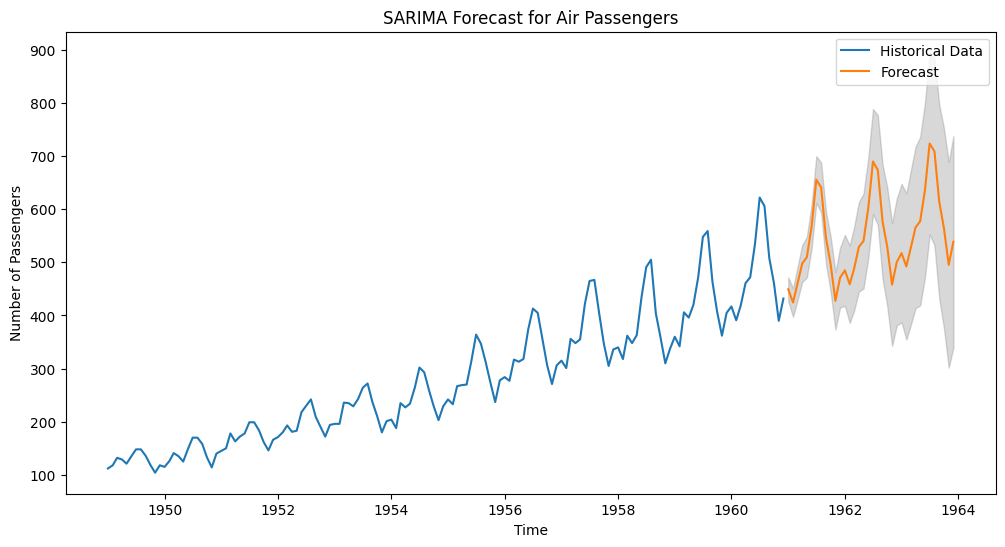

In [33]:
# Forecast future values (e.g., next 12 months)
forecast_steps = 36
forecast = result.get_forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Historical Data')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast.row_labels , forecast.conf_int()['lower Passengers'], forecast.conf_int()['upper Passengers'], color='gray', alpha=0.3)
plt.title('SARIMA Forecast for Air Passengers')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()